<div align='center'>
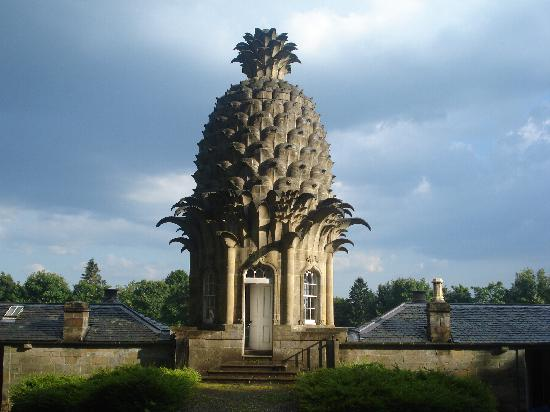
</div>

# Kaggle Competition - 🏠 Prices; Group C

## Introduction?
Contexte, classe, travail de groupe, découverte de l'apprentissage automatique et de 🐍


Apprentissage supervisé?








## CRISP-DM
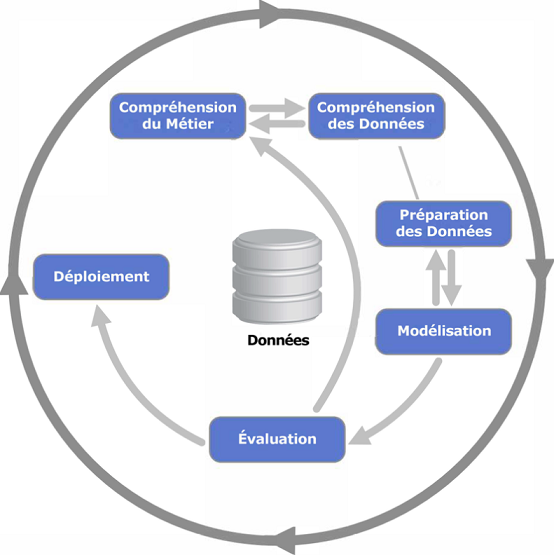

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

### CRISP-DM - Business Understanding
#### Determine business objectives

La problématique métier est la suivante : 

"Comment identifier au plus près le prix de vente de maisons situées à Ames, Iowa, en prenant en compte la marge de négociation?"


#### Assess situation
##### Inventory of resources
* personnel
    * Baptiste Andres 🐤
    * Kevin Seewer 🐤
    * Antoine Induni🦅
* data
    * training set et test set fournis par [Kaggle](https://www.kaggle.com/)

##### Requirements, assumptions, and constraints

List the assumptions made by the project. These may be assumptions about the data that can be verified
during data mining, but may also include non-verifiable assumptions about the business related to the
project.

Pour commencer, nous avons essayer de définir ce qui pour nous, pouvais influencer le prix d'un bien immobilier.

1. Quels sont les critères qui, d'après nous, pourraient influencer sur la valeur d'une maison
    - La supperficie totale habitable (m2)
    - Le nombre de chambres
    - Le nombre de salle de bain
    - La supperficie du terrain
    - L'année de construction et de rénovation
    - La hauteur sous-plafond
    - Le style architectural
    - La présence ou non d'un garage
    - La présence ou non de balcons
    - La présence ou non de cave/sous-sol et grenier
    - La modernité des systèmes de chauffage et d'évacuation des eaux usées
    - La modernité de la cuisine et des pièces d'eau
    - La proximité des transports publiques et des axes routiers
    - La proximité avec les commerces et des lieux de loisirs
    - La proximité avec les écoles et le lieu de travail
    - La réputation du quartier (voisinage)

2. Qu'est-ce qui, selon moi, pourrait faire varier la marge de négociation
    - Le budget de l'acheteur
    - Le taux moyen de négociation pour les biens immobiliters dans la région
    - Les taux hypothécaires du marché actuel
    - La quantité de biens similaires dans la même zone
    - La durée de parution de l'annonce de vente
    - Le nombre de visite d'un bien
 
Comment vérifier?

##### Risks and Contingencies
* Prix ne correspondant pas à la réalité, perte à la vente ou à l'achat
##### Terminology
* TBD?

##### Costs and Benefits
Estimate costs for data collection
* Estimate costs of developing and implementing a solution
* Identify benefits (e.g., improved customer satisfaction, ROI, and increase in revenue)
* Estimate operating costs

#### Determine data mining goals

##### Data mining goals

* Prédire le prix de vente de chaque maison, pour chaque ID dans le jeux de test, nous devons pouvoir prédire le prix de chaque variable SalePrice. 

#####  Data mining success criteria
Prix proche de la valeur du marché?

#### Produce project plan
##### Project plan
* Sprint de 2 semaines
* Restitution le 07.06.2020

##### Initial assessment of tools and techniques
* [Python](https://www.python.org/) 👍
* [Jupyter Notebook](https://jupyter.org/) 👍
* [pandas](https://pandas.pydata.org/) 👍
* [NumPy](https://numpy.org/) 👍
* [scikit-learn](https://scikit-learn.org/) 👍
* [Matplotlib](https://matplotlib.org/) 👍

### CRISP-DM - Data Understanding

* Collect initial data
* Describe data
* Explore data
* Verify data quality

#### Chargement des données de test
* Utilisation de Pandas
* Création d'un Pandas DataFrame depuis le csv

In [52]:
#importons les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [53]:
def supprimeColonne(dataset,maximumMissing):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcent'])
    dataset = dataset.drop((missing_data[missing_data['Total'] > maximumMissing]).index,1)
    return dataset;

In [54]:
#chargement du fichier de train
df_train = pd.read_csv('train.csv')
#chargement du fichier de test
df_test = pd.read_csv('test.csv')

In [55]:
#affichage des dimensions du DataFrame. On obtient 1460 rows et 81 colonnes
df_train.shape

(1460, 81)

In [56]:
#affichage du nom des 81 colonnes
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
#affichage des 5 premières lignes
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Listes des colonnes du dataset

    SalePrice - Prix de vente ( la valeur à identifier)
    MSSubClass:Classe de la construction
    MSZoning: classification de la zone
    LotFrontage: Pieds linéaires de rue reliés à la propriété
    LotArea: taille du terrain en pieds au carré
    Street: type de route d'acces
    Alley: type d'allée d'accès
    LotShape: Forme générale de la propriété
    LandContour: la platitude de la propriété
    Utilities: types d'utilisation possible 
    LotConfig: Configuration de la propriété
    LandSlope: pente
    Neighborhood: Emplacements physiques dans les limites de la ville d'Ames
    Condition1: Proximité de la route principale ou du chemin de fer
    Condition2: Proximité de la route principale ou du chemin de fer (si les deux sont présents)
    BldgType: Type of dwelling
    HouseStyle: Type d'habitation
    OverallQual: Matière globale et qualité de finition
    OverallCond: Évaluation de l'état général
    YearBuilt: Date de construction d'origine
    YearRemodAdd: date de réstauration
    RoofStyle: Type de plafond
    RoofMatl: matériel du plafond
    Exterior1st: Revêtement extérieur sur maison
    Exterior2nd: Revêtement extérieur sur maison (si plus d'un matériel)
    MasVnrType: Type de placage de maçonnerie
    MasVnrArea: Surface de placage de maçonnerie en pieds carrés
    ExterQual: Qualité des matériaux extérieurs
    ExterCond: État actuel du matériau à l'extérieur
    Foundation: Type de fondation
    BsmtQual: Hauteur du sous-sol
    BsmtCond: État général du sous-sol
    BsmtExposure: Murs de sous-sol au rez-de-chaussée ou au rez-de-jardin
    BsmtFinType1: Qualité de la surface finie du sous-sol
    BsmtFinSF1: Type 1 finis en pieds carrés
    BsmtFinType2: Qualité de la deuxième zone finie (si présente)
    BsmtFinSF2: Type 2 finis en pieds carrés
    BsmtUnfSF: Pieds au carrés de sous-sol inachevés
    TotalBsmtSF: Superficie totale en pieds carrés du sous-sol
    Heating: Type de chauffage
    HeatingQC: Heating quality and condition
    CentralAir: Qualité et état du chauffage
    Electrical: Système électrique
    1stFlrSF: Pieds carrés au premier étage
    2ndFlrSF: Pieds carrés au deuxième étage
    LowQualFinSF: Pieds carrés finis de faible qualité (tous les étages)
    GrLivArea: Surface habitable au-dessus du sol (sol) pieds carrés
    BsmtFullBath: Salle de bain complète au sous-sol
    BsmtHalfBath: Salle de bain WC seulement au sous-sol
    FullBath: Salles de bain complètes au-dessus du niveau du sol
    HalfBath: Demi-bains au-dessus du sol
    Bedroom: Nombre de chambres au dessus du sous-sol
    Kitchen: Nombre de cuisines
    KitchenQual: Qualité de la cuisine
    TotRmsAbvGrd:Nombre total de chambres au-dessus du niveau du sol (n'inclut pas les salles de bains)
    Functional: Évaluation des fonctionnalités domestiques
    Fireplaces: Nombre de cheminées
    FireplaceQu: Qualité cheminée
    GarageType: Localisation d'un garage
    GarageYrBlt: Année de construction du garage
    GarageFinish: Finition intérieure du garage
    GarageCars: Taille du garage en capacité de voiture
    GarageArea: Taille du garage en pieds carrés
    GarageQual: Qualité du garage
    GarageCond: État du garage
    PavedDrive: Allée pavée
    WoodDeckSF: Surface du pont en bois en pieds carrés
    OpenPorchSF: Porche ouvert en pieds carrés
    EnclosedPorch: Porche fermé en pieds carrés
    3SsnPorch: Véranda trois saisons en pieds carrés
    ScreenPorch: Écran de la véranda en pieds carrés
    PoolArea: Espace piscine en pieds carrés
    PoolQC: Qualité de la piscine
    Fence: Qualité de la clôture
    MiscFeature: caractéristique diverse non couverte dans d'autres catégories
    MiscVal: $ Valeur de la fonction divers
    MoSold: Mois vendu
    YrSold: Année de vente
    SaleType: Type de vente
    SaleCondition: Condition de vente

Dataset labellisé
label -> SalePrice

#### Etudes des features
* Quelles colonnes sont relevantes?
Il y a 1460 instance de données d'entrainement et 1460 de données de test. il y a 81 attributs, 36 sont quantititif et 43 de catégorisation ( + l'id et le prix de vente ( SalePrice)

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities

In [58]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [59]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [60]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [61]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Nous remarquons que le maximum de SalePrice est de 7'550'000 et le minimum est de 34'900 la valeur minimum n'est pas égal à 0 ce qui montre que les données exploitables sans trop de problèmes. 

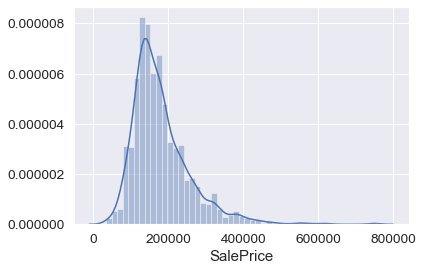

In [62]:
sbn.distplot(df_train['SalePrice']);

Nous remarquons que la distribution est standard avec un pic clair. Cependant, le pic se trouve très à gauche. Ce qui justifie l'utilisation du mod

In [63]:
###matrice de corrélation

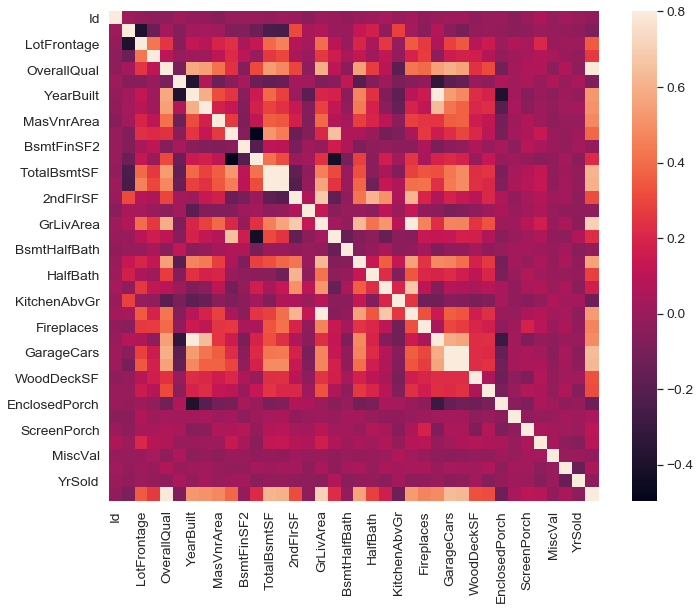

In [64]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sbn.heatmap(corrmat, vmax=.8, square=True);

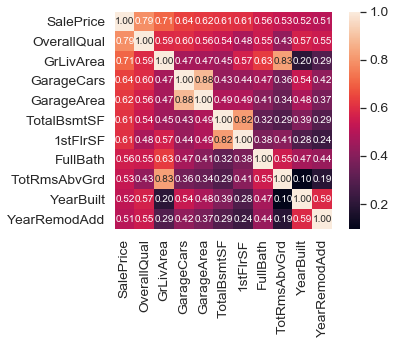

In [65]:
k =11
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sbn.set(font_scale=1.25)
hm = sbn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Missing data 

In [66]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcent'])
missing_data.head(20)



,Total,Pourcent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Nous pouvons directement remarqué que la variablePoolQC A 99.5% de données manquantes. Nous pouvons concidérer qu'elle n'est pas utilisée et pouvons la supprimer.Idem pour MiscFeature à 96.30%

In [69]:
df_test = supprimeColonne(df_test,1369)
df_train = supprimeColonne(df_train,1369)
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcent'])
missing_data.head(20)


AttributeError: 'NoneType' object has no attribute 'isnull'

### CRISP-DM - Data Preparation
* Select data
* Clean data
* Construct data
* Integrate data 
* Format data

#### Select Data
##### Sélection des enregistrements (lignes)
Tous les enregistrements seront utilisés (train & test)

##### Sélection des attributs ou des caractéristiques (colonnes)
TBD

#### Clean Data
* Données manquantes
* Erreurs dans les données
* Erreurs de mesure

#### Construct Data
Imputation de données?
* MCAR (Missing completely at random)
* MAR (Missing at random)
* MNAR (Missing not at random)

#### Integrate Data
Nous allons utiliser que la source de données fournie par Kaggle, nous n'avons pas besoin de fusionner ou d'ajouter des données.

#### Format Data
comme tri préalable des données?

### CRISP-DM - Modeling

#### Select modeling technique
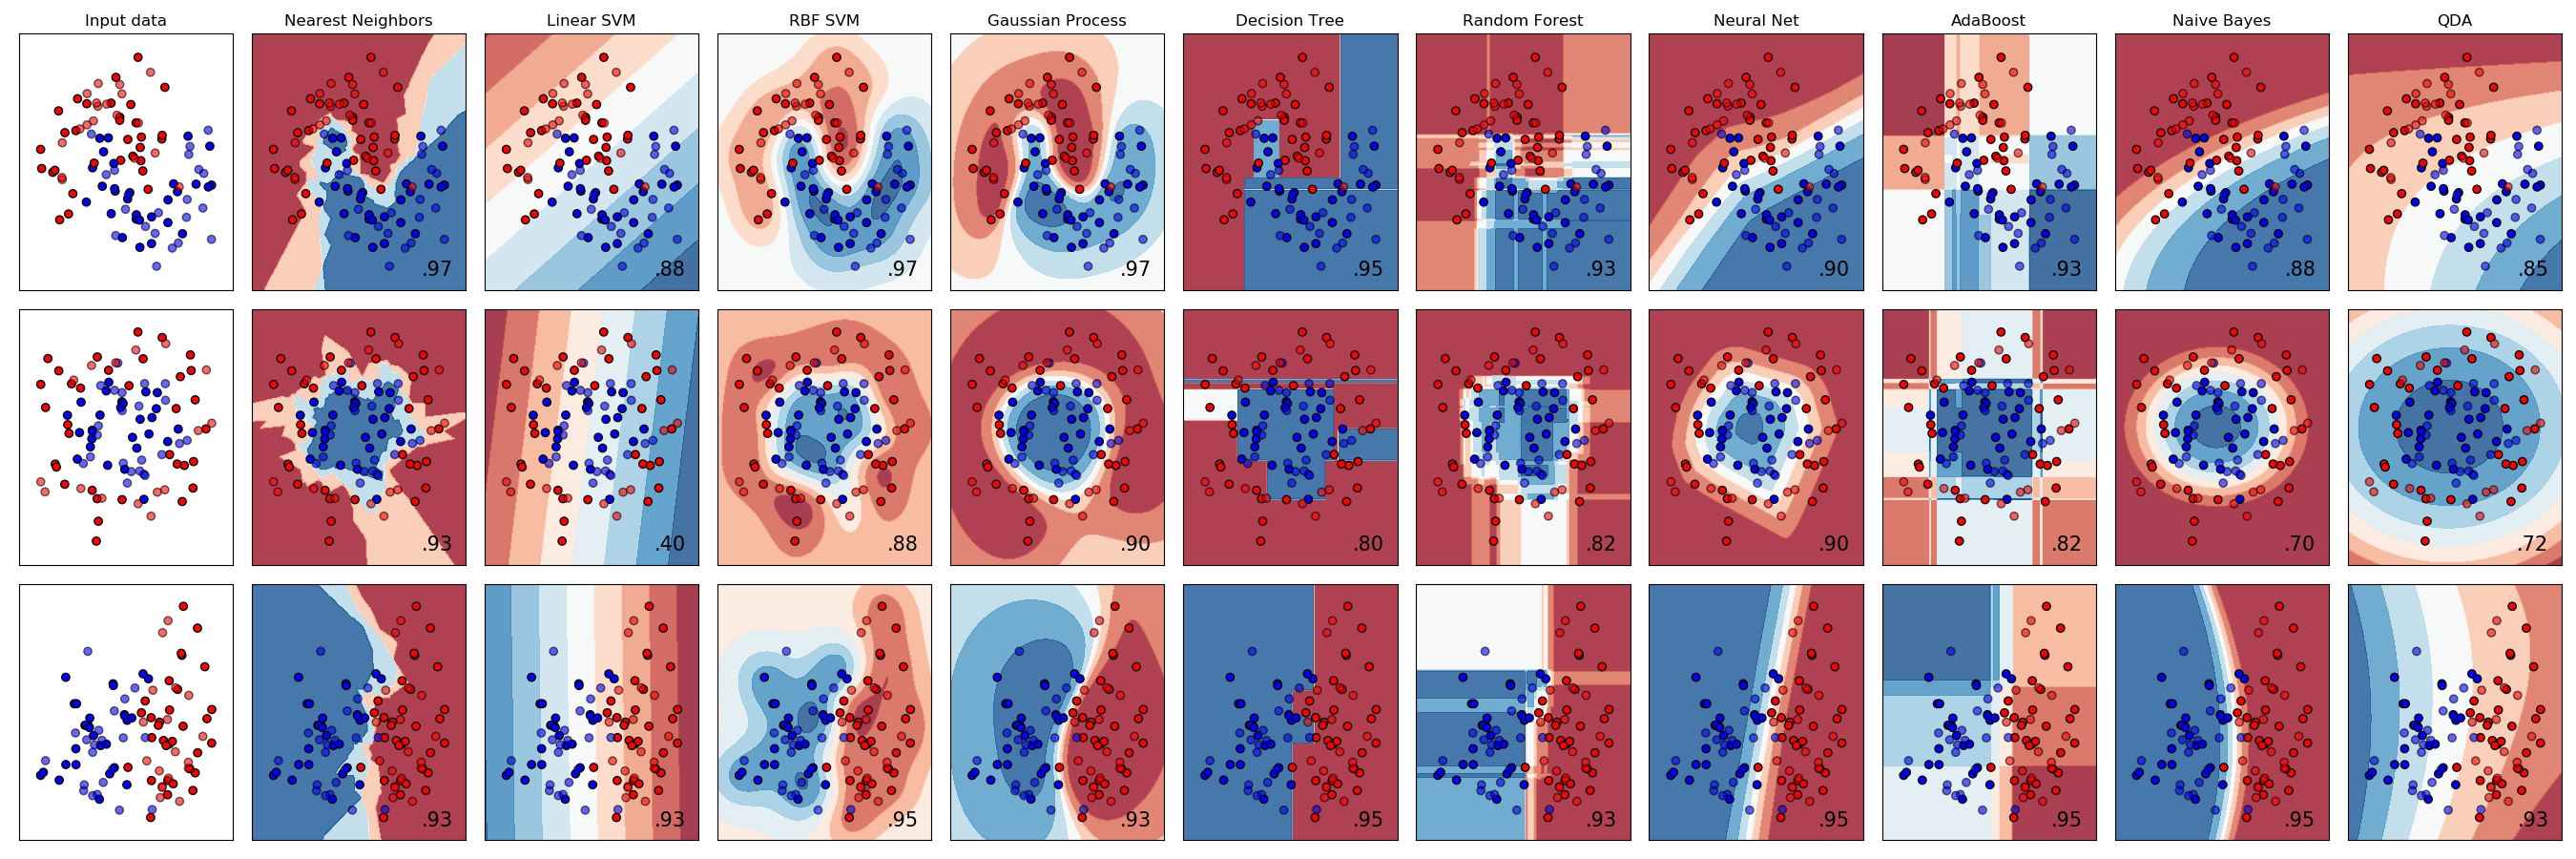
#### Generate test design
Les tests sont fournis et exécuté sur Kaggle
#### Build model
##### Exécution des modèles

In [68]:
from sklearn.ensemble import RandomForestClassifier
df_test = pd.read_csv("test.csv")
y = df_train["SalePrice"] #<class 'pandas.core.series.Series'>

features = ["OverallQual", "GrLivArea"]

X = pd.get_dummies(df_train[features]) #Convert categorical variable into dummy/indicator variables. DataFrame
#print(train_data[features])
#print(X)
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})
output.tail()
output.to_csv('GroupC_submission.csv', index=False)

#### Assess model
Selon résultats fournis par Kaggle


### CRISP-DM - Evaluation
* Evaluate results 
* Review process
* Determine next steps 

### CRISP-DM - Deployment 
* Plan deployment 
* Plan monitoring and maintenance
* Produce final report 
* Review project